# import Libraries

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.datasets import load_breast_cancer
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import confusion_matrix, precision_score, recall_score, roc_auc_score, roc_curve

# Load dataset

In [2]:

data = load_breast_cancer()
X = data.data
y = data.target

# Split into train and test sets

In [3]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42, stratify=y)


# Standardize features

In [4]:
scaler = StandardScaler()
X_train = scaler.fit_transform(X_train)
X_test = scaler.transform(X_test)

# Fit Logistic Regression model

In [5]:
model = LogisticRegression(max_iter=1000, solver='liblinear')
model.fit(X_train, y_train)

LogisticRegression(max_iter=1000, solver='liblinear')

# Predict probabilities for ROC and threshold tuning

In [6]:

y_prob = model.predict_proba(X_test)[:, 1]



# Default threshold 0.5 for classification

In [7]:
y_pred_05 = (y_prob >= 0.5).astype(int)

# Confusion matrix

In [8]:
cm = confusion_matrix(y_test, y_pred_05)

# Precision and Recall

In [9]:
precision = precision_score(y_test, y_pred_05)
recall = recall_score(y_test, y_pred_05)

# ROC-AUC score

In [10]:

roc_auc = roc_auc_score(y_test, y_prob)

# ROC Curve

In [11]:

fpr, tpr, thresholds = roc_curve(y_test, y_prob)

# Plot ROC Curve

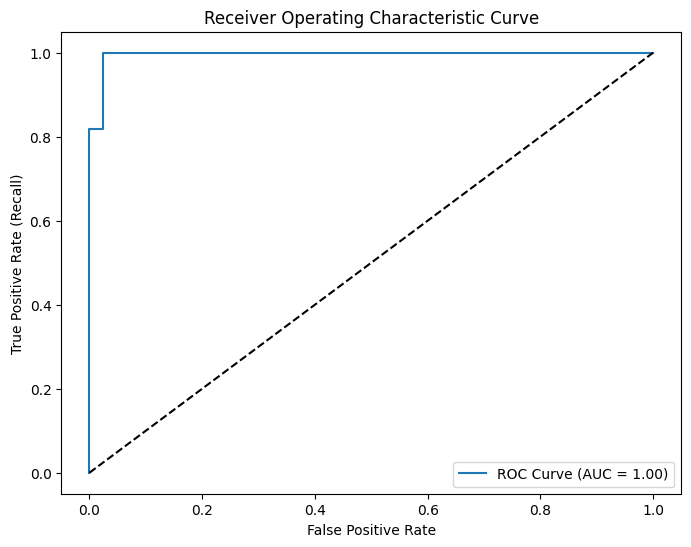

In [12]:
plt.figure(figsize=(8,6))
plt.plot(fpr, tpr, label=f'ROC Curve (AUC = {roc_auc:.2f})')
plt.plot([0, 1], [0, 1], 'k--')
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate (Recall)')
plt.title('Receiver Operating Characteristic Curve')
plt.legend()
plt.show()


In [13]:
threshold = 0.3
y_pred_tuned = (y_prob >= threshold).astype(int)
cm_tuned = confusion_matrix(y_test, y_pred_tuned)
precision_tuned = precision_score(y_test, y_pred_tuned)
recall_tuned = recall_score(y_test, y_pred_tuned)

print("Confusion Matrix (threshold=0.5):\n", cm)
print(f"Precision (threshold=0.5): {precision:.2f}")
print(f"Recall (threshold=0.5): {recall:.2f}")
print(f"ROC-AUC Score: {roc_auc:.2f}")

print("\nConfusion Matrix (threshold=0.3):\n", cm_tuned)
print(f"Precision (threshold=0.3): {precision_tuned:.2f}")
print(f"Recall (threshold=0.3): {recall_tuned:.2f}")


Confusion Matrix (threshold=0.5):
 [[41  1]
 [ 1 71]]
Precision (threshold=0.5): 0.99
Recall (threshold=0.5): 0.99
ROC-AUC Score: 1.00

Confusion Matrix (threshold=0.3):
 [[40  2]
 [ 0 72]]
Precision (threshold=0.3): 0.97
Recall (threshold=0.3): 1.00
